**Project Overview**

This project aims to analyze air quality data,specially focusing on NO2 levels,to uncover trends,seasonal patterns,and insights.By using Python's poweful data manipulation and visualizations libraries,we will:

- **Clean and preprocess the data** to ensure accuracy.
- **Resample the data** to aggregate it at a daily level.
- **Apply rolling window** to smooth  the data and highlight trends.
- **Perform seasonal decomposition** to separate the data into trend,seasonal,and residuals components.
- **Visualize the findings** effectively 

## Table of Contents
- [Introduction](#introduction)
- [Data Preparation](#data-preparation)
- [Resampling and Rolling Windows](#resampling-and-rolling-windows)
- [Seasonal Decomposition](#seasonal-decomposition)
- [Visualization](#visualization)
- [Conclusion](#conclusion)
.

## Introduction
In this analysis, we will explore air quality data using time series analysis techniques. We clean and preprocess the data, apply resampling and rolling windows to analyze trends, decompose the data to identify seasonal patterns, and visualize our findings. Each step is explained in detail to provide a comprehensive understanding of the process.

## Data Preparation

Data preparation is a crucial as it ensures the data is clean and ready for analysis.

- **Load the Data** : We load the dataset using pandas.
- **Check Column Names** : Print the first few rows and columns names to understand the data structure.
- **Set Index** : Ensures the `datetime` column is set as the index.
- **Select Relevant Columns** : Choose the columns we interested in.
- **Handle Misssing Values** : Drop rows with missing values.
- **Sort the Data** : Ensure the data is sorted by datetime for proper time series analysis.

In [35]:
import pandas as pd

#load the dataset
data=r"C:\Users\pc\Downloads\AirQualityUCI.csv"
df_air_quality=pd.read_csv(data,sep=';',decimal=',',na_values=-200)

#print the first few rows and column names to verify
print(df_air_quality.head())
print(df_air_quality.columns)



         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [37]:
# Ensure 'datetime' is correctly set as index
df_air_quality['datetime']=pd.to_datetime(df_air_quality['Date'] + ' ' + df_air_quality['Time'],format='%d/%m/%Y %H.%M.%S')
df_air_quality.set_index('datetime',inplace=True)


In [39]:
#select the required column(check exact column names from df_air_quality.columns output)
selected_columns=['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
df_air_quality = df_air_quality[selected_columns]

In [41]:
#Drop missing values
df_air_quality.dropna(inplace=True)

In [43]:
#ensure the data is sorted by datetime
df_air_quality.sort_index(inplace=True)
print(df_air_quality.head())

                     PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
datetime                                                                  
2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

                     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
datetime                                                                      
2004-03-10 18:00:00    113.0        1692.0       1268.0  13.6  48.9  0.7578   
2004-03-10 19:00:00     92.0        1559.0        972.0  13.3  47.7  0.7255   
2004-03-10 20:00:00    114.0        1555.0       1074.0  11.9  54.0  0.7502   
2004-03-10 21:00:00    122.0        1584.0       1203.0  11.0  60.0  0.7867   


**Code Explanation** :

- **Load the data** : We use `pd.read_csv` to load the dataset from a data.We specify the separator as `;` the decimal and parse the `Date` and `Time` columns together into a new `datetime` columns.We also specify that `-200` should be considered as a `NaN`.
- **Print the First Few Rows** : We use `print(df_air_quality.head()) to display the first few rows of the datasets to verify it loaded correctly.
- **Ensures datetime is set as index** : We convert the `Date` and `Time` columns to a datetime object and set is as the index using `df_air_quality.set_index('datetime', inplace=True).`.
- **Select Relevant Columns** : We specify a list of columns we are interested in and crate a new DataFrame with just those columns
- **Handle Missing Values** : We drop rows with missing values using `df_air_quality.dropna(inplace=True)`.
- **Sort the Data** : We ensures the data is sorted by the datetime index using `df_air_quality.sort_index(inplace=True)


**Resmapling and Rolling Windows**

To analyze trends,we use resampling and rolling windows.

- **Plot the Data** : Visualize the origional and smoothed data to observe trends.
- **Resample Data** : Resample the data to daily averages to smoothes out fluctuations.
- **Apply Rolling Window** : Apply a 7-day rolling window to further smooth the time series.

In [47]:
import pandas as pd
#load the dataset
data=r"C:\Users\pc\Downloads\AirQualityUCI.csv"
df_air_quality=pd.read_csv(data,sep=';',decimal=',',na_values=-200)

#print the first few rows and column names to verify
print(df_air_quality.head())
print(df_air_quality.columns)


         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0

In [49]:
#Ensure 'datetime` is correctly set as index
df_air_quality['datetime']=pd.to_datetime(df_air_quality['Date'] + ' ' + df_air_quality['Time'], format='%d/%m/%Y %H.%M.%S')
df_air_quality.set_index('datetime',inplace=True)


In [51]:
#select the required columns(check exact column  names from df_air_quality.columns output)
selected_columns = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)']
df_air_quality=df_air_quality[selected_columns]


In [53]:
#Drop missing values
df_air_quality.dropna(inplace=True)


In [55]:
#Ensure the data is sorted by datetime
df_air_quality.sort_index(inplace=True)
print(df_air_quality.head())


                     PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
datetime                                                                  
2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

                     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
datetime                                                                      
2004-03-10 18:00:00    113.0        1692.0       1268.0  13.6  48.9  0.7578   
2004-03-10 19:00:00     92.0        1559.0        972.0  13.3  47.7  0.7255   
2004-03-10 20:00:00    114.0        1555.0       1074.0  11.9  54.0  0.7502   
2004-03-10 21:00:00    122.0        1584.0       1203.0  11.0  60.0  0.7867   


In [63]:
import matplotlib.pyplot as plt
#resample the data to daily averages
df_daily_air_quality=df_air_quality.resample('D').mean()
print(df_daily_air_quality)


            PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)     NO2(GT)  \
datetime                                                                      
2004-03-10  1316.500000   8.450000     912.333333   1167.333333  108.833333   
2004-03-11  1265.409091   8.568182     879.954545   1233.227273  102.863636   
2004-03-12  1309.285714  12.666667    1036.476190   1052.619048  120.285714   
2004-03-13  1346.227273  11.381818    1010.181818    978.454545  120.500000   
2004-03-14  1372.409091   9.836364     950.590909    999.090909  111.681818   
2004-03-15  1486.181818  17.172727    1176.772727    818.954545  120.909091   
2004-03-16  1376.454545  14.504545    1102.363636    902.318182  120.863636   
2004-03-17  1404.181818  16.418182    1144.363636    893.090909  122.681818   
2004-03-18  1276.000000  12.362500     999.750000    944.625000   99.875000   
2004-03-19          NaN        NaN            NaN           NaN         NaN   
2004-03-20          NaN        NaN            NaN   

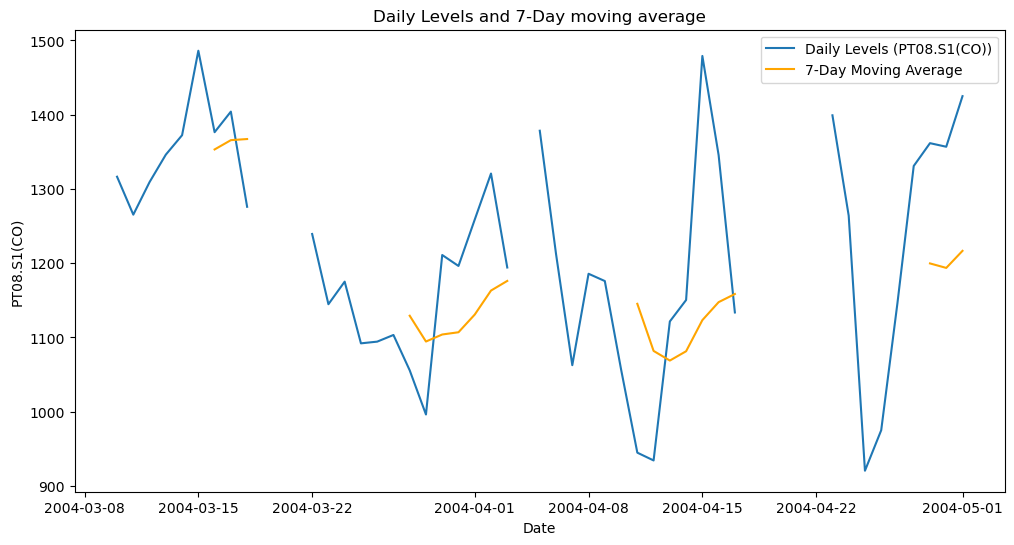

In [67]:
#Apply a rolling window to smooth the time series(e.g, 7-day rolling mean)
df_daily_rolling_air_quality=df_daily_air_quality.rolling(window=7).mean()



# Plot the resampled data and rolling mean for one of the columns(e.g., 'PT08.S1(CO)')

plt.figure(figsize=(12,6))
plt.plot(df_daily_air_quality['PT08.S1(CO)'], label='Daily Levels (PT08.S1(CO))')
plt.plot(df_daily_rolling_air_quality['PT08.S1(CO)'], label='7-Day Moving Average', color='orange')
plt.title('Daily Levels and 7-Day moving average')
plt.xlabel('Date')
plt.ylabel('PT08.S1(CO)')
plt.legend()
plt.show()

**Code Explanation**

- **Resample Data** : We use `df_air_quality.resample('D').mean()` to resample the data to daily frequency and calculate the mean for each day.This smooths out the series by aggregating the data into daily averages.
- **Apply Rolling Window** : We apply a 7-day rolling window using `df_daily_air_quality.rolling(window=7).mean()` which further smooths the time series by calculating the average of the current day and the previous six day.
- **Plot the Data** : Use **Matplotlib** to plot the origional daily levels and the 7-day moving average.This helps us visualize the trend and fluctuations in the data.

## Seasonal Decomposition

Seasonal Decomposition helps in breaking down the time series data into trend,seasonal,and residual component.

- **Ensure Frequency** : Ensure the index has a frequency set.
- **Interpolate Missing Values** : Fill missing values using interpolation.
- **Perform Seasonal Decompostion** : Decompose the tiem series to identify pattern with a weekly period(7days)

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Ensure the index has a frequency set
df_daily_air_quality=df_daily_air_quality.asfreq('D')

#interpolate missing values
df_daily_interpolated_air_quality=df_daily_air_quality.interpolate()

#perform seasonal decomposition on one of the columns(e.g., 'PT08.S1(CO)') with a weekly period

decomposition_result=seasonal_decompose(df_daily_interpolated_air_quality['PT08.S1(CO)'], model='multiplicative', period=7)




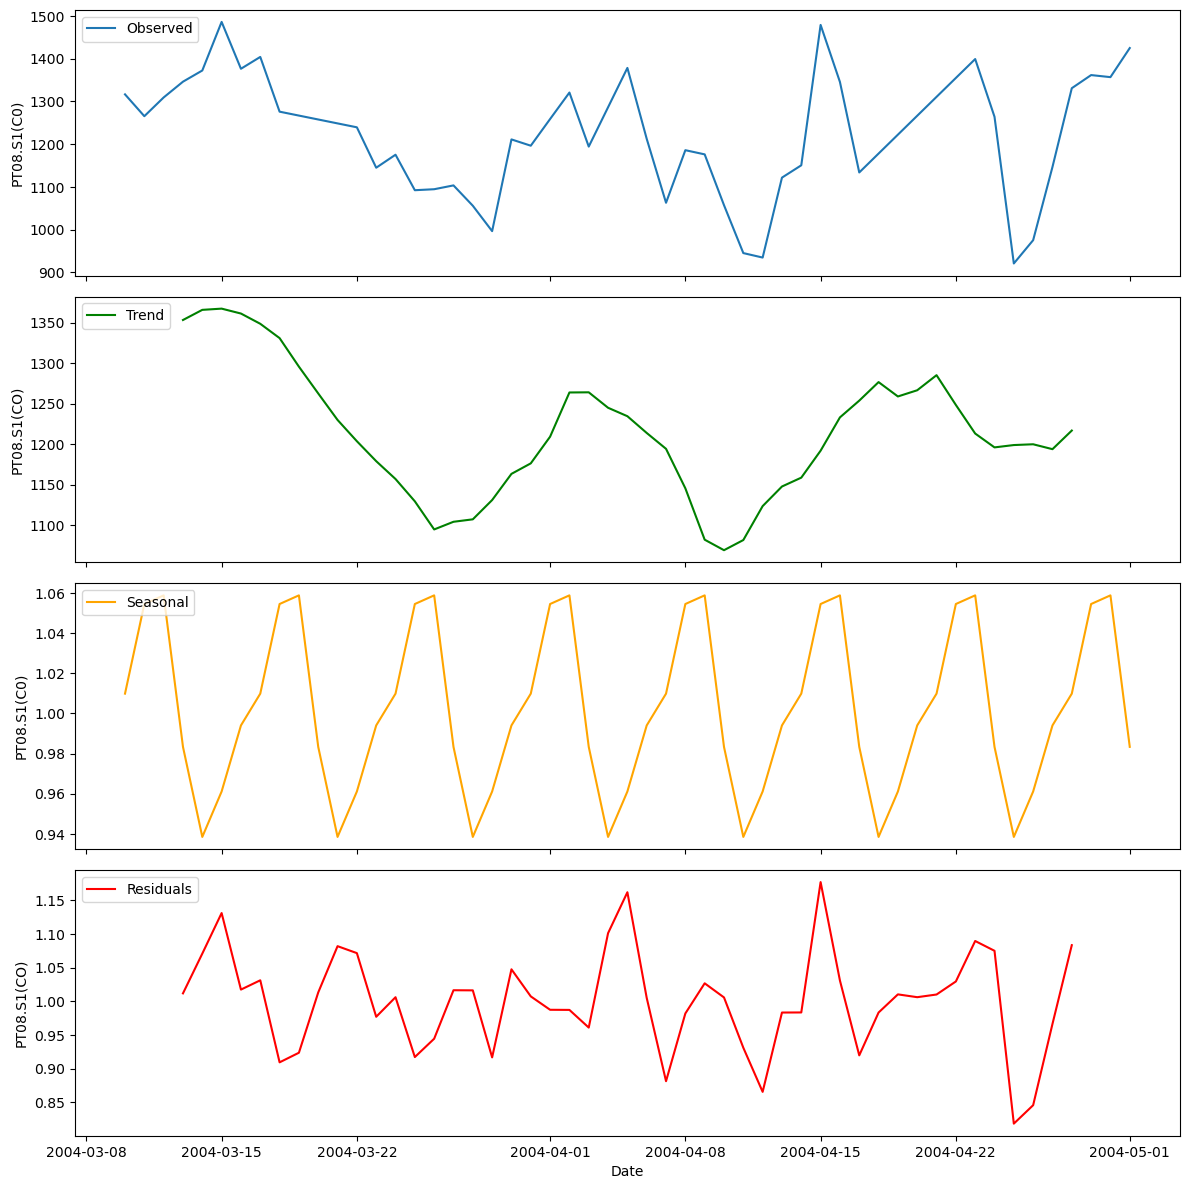

In [86]:
#plot the decomposed result
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(12,12),sharex=True)

#observed
ax1.plot(decomposition_result.observed,label='Observed')
ax1.legend(loc='upper left')
ax1.set_ylabel('PT08.S1(C0)')

#Trend
ax2.plot(decomposition_result.trend,label='Trend',color='green')
ax2.legend(loc='upper left')
ax2.set_ylabel('PT08.S1(CO)')

#Seasonal
ax3.plot(decomposition_result.seasonal,label='Seasonal',color='orange')
ax3.legend(loc='upper left')
ax3.set_ylabel('PT08.S1(C0)')

#Residuals
ax4.plot(decomposition_result.resid,label='Residuals',color='red')
ax4.legend(loc='upper left')
ax4.set_ylabel('PT08.S1(CO)')
ax4.set_xlabel('Date')

plt.tight_layout()
plt.show()





**Code Explanation**:

- **Ensure Frequency** : We set the frequency of the date-time index to daily using `df_daily_air_quality.asfreq('D`)`.This ensure the time series is evenly spaced,which is required for seasonal decomposition.
- **Interpolate missing values** : We fill any missing values using linear interpolation with `df_daily_air_quality.interpolate()`.This ensure there are no gaps in the data.
- **Perform Seasonal Decomposition** : We use `seasonal_decompose` to decompose the time series into observed,trend,seasonal,and residual components.We specify a multiplicative models and a period of 7 days to capture weekly patterns.
- **Plot the Decomposed Components**: We plot the observed, trend, seasonal, and residual components using matplotlib. This helps us understand the underlying patterns and variations in the data.

# Visualization

Visualization helps in understanding and communicating the findings effectively.

- **Visualize Decompose Components** : Plot the decomposed components(observed,trend,seasonal,and residuals)for better insights.
- **Visualize Origional and smoothed Data** : Plot multiple columns to observe trends.

In [ ]:
#visualize origional and smoothed data for multiple columns
columns_to_plot = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)']

for column in columns_to_plot:
    plt.figure(figsize=(12,6))
    plt.plot(df_daily_air_quality[column], label=f'Daily Levels ({column})')
    plt.plot(df_daily_rolling_air_quality[column], label='7-Day Moving Average', color='orange')
    plt.title(f'Daily Levels and 7-Day Moving Average for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    
